*Creado por:*

*Isabel Maniega*

# Pandas. Temario

1. [Vista de los datos](#Vista-de-los-datos)
2. [Selección](#Seleccion)
3. [Setting](#Setting-(Modificacion-del-dataframe))
4. [Missing values](#Missing-values)
5. [Operaciones](#Operaciones)
6. [Unión de dataframe](#Union-de-dataframe)
7. [Grouping](#Grouping)
8. [Reshaping](#Reshaping)
9. [Time Series](#Time-Series)
10. [Categoricals](#Categoricals)
11. [Plotting](#Plotting)

# Pandas

Contiene dos tipos de estructuras:

- **Series**: una matriz etiquetada unidimensional que contiene datos de cualquier tipo como números enteros, cadenas, objetos Python, etc.
- **Dataframe**: una estructura de datos bidimensional que contiene datos como una matriz bidimensional o una tabla con filas y columnas.

In [1]:
# pip install pandas

In [2]:
from IPython import display

In [3]:
import pandas as pd
import numpy as np

## Creación de un dataframe

pd.DataFrame()

* A partir de Series:

In [4]:
# Series:

s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [5]:
# date_range(genera un rango de fecha apartir de un valor, marcando el número de datos a generar (periods)
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,1.454935,-0.218869,1.820150,-1.803966
2013-01-02,-0.500388,0.284103,-1.374289,-1.457538
2013-01-03,-0.975626,-0.671088,0.514290,0.540713
2013-01-04,0.970953,-2.358905,-0.991593,-0.900995
2013-01-05,0.534581,-0.930495,1.116256,-0.388515
2013-01-06,0.974511,-0.362095,-1.145968,-0.890391


In [7]:
# dtypes nos muestra de que tipo son los datos:

df.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

* A partir de un diccionario:

In [8]:
notas = [10, 9, 5, 4, 8]

alumnos = ["Paula", "Fermin", "Pedro", "Luis", "Ana"]

evaluacion = {"Alumnos": alumnos, "Notas": notas}

df_eval = pd.DataFrame(evaluacion)
df_eval

,Alumnos,Notas
0,Paula,10
1,Fermin,9
2,Pedro,5
3,Luis,4
4,Ana,8


* A partir de listas:

In [9]:
df_evaluar = pd.DataFrame(alumnos, columns=["Alumnos"])
df_evaluar

,Alumnos
0,Paula
1,Fermin
2,Pedro
3,Luis
4,Ana


Otra forma...

In [10]:
df_evaluar = pd.DataFrame(list(zip(alumnos, notas)), columns=["Alumnos", "Notas"])
df_evaluar

,Alumnos,Notas
0,Paula,10
1,Fermin,9
2,Pedro,5
3,Luis,4
4,Ana,8


## Vista de los datos

In [11]:
# Muestra las primeras filas del dataframe, por defecto las 5 primeras
df.head()

,A,B,C,D
2013-01-01,1.454935,-0.218869,1.820150,-1.803966
2013-01-02,-0.500388,0.284103,-1.374289,-1.457538
2013-01-03,-0.975626,-0.671088,0.514290,0.540713
2013-01-04,0.970953,-2.358905,-0.991593,-0.900995
2013-01-05,0.534581,-0.930495,1.116256,-0.388515


In [12]:
df.head(2)

,A,B,C,D
2013-01-01,1.454935,-0.218869,1.820150,-1.803966
2013-01-02,-0.500388,0.284103,-1.374289,-1.457538


In [13]:
# Muestra las últimas filas de un dataframe, por defecto las 5 últimas:

df.tail()

,A,B,C,D
2013-01-02,-0.500388,0.284103,-1.374289,-1.457538
2013-01-03,-0.975626,-0.671088,0.514290,0.540713
2013-01-04,0.970953,-2.358905,-0.991593,-0.900995
2013-01-05,0.534581,-0.930495,1.116256,-0.388515
2013-01-06,0.974511,-0.362095,-1.145968,-0.890391


In [14]:
df.tail(2)

,A,B,C,D
2013-01-05,0.534581,-0.930495,1.116256,-0.388515
2013-01-06,0.974511,-0.362095,-1.145968,-0.890391


In [15]:
# Muestra el valor de la primera columna que suele ser un valor único (id), en este ejemplo una fecha:

df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [16]:
# Muestra el nombre de las columnas:

df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [17]:
# Podemos convertir un dataframe en una matriz de numpy con:

df.to_numpy()

array([[ 1.45493465, -0.21886851,  1.82014986, -1.80396643],
       [-0.50038834,  0.2841034 , -1.37428926, -1.45753791],
       [-0.97562574, -0.67108764,  0.51428952,  0.54071329],
       [ 0.97095254, -2.3589046 , -0.99159251, -0.90099474],
       [ 0.53458143, -0.93049496,  1.1162561 , -0.3885155 ],
       [ 0.97451082, -0.36209531, -1.14596775, -0.89039059]])

In [18]:
# Para obtener los estadísticos más representativos usamos:

df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.409828,-0.709558,-0.010192,-0.816782
std,0.947577,0.907690,1.342238,0.827504
min,-0.975626,-2.358905,-1.374289,-1.803966
25%,-0.241646,-0.865643,-1.107374,-1.318402
50%,0.752767,-0.516591,-0.238651,-0.895693
75%,0.973621,-0.254675,0.965764,-0.513984
max,1.454935,0.284103,1.820150,0.540713


In [19]:
# Podemos dar la vuelta a la tabla y poner lo que esta en filas en columnas y viceversa:

df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,1.454935,-0.500388,-0.975626,0.970953,0.534581,0.974511
B,-0.218869,0.284103,-0.671088,-2.358905,-0.930495,-0.362095
C,1.820150,-1.374289,0.514290,-0.991593,1.116256,-1.145968
D,-1.803966,-1.457538,0.540713,-0.900995,-0.388515,-0.890391


In [20]:
# Colocar los valores según el indice:

df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-1.803966,1.820150,-0.218869,1.454935
2013-01-02,-1.457538,-1.374289,0.284103,-0.500388
2013-01-03,0.540713,0.514290,-0.671088,-0.975626
2013-01-04,-0.900995,-0.991593,-2.358905,0.970953
2013-01-05,-0.388515,1.116256,-0.930495,0.534581
2013-01-06,-0.890391,-1.145968,-0.362095,0.974511


In [21]:
# Ordenar los datos según una columna:

df.sort_values(by="B")

,A,B,C,D
2013-01-04,0.970953,-2.358905,-0.991593,-0.900995
2013-01-05,0.534581,-0.930495,1.116256,-0.388515
2013-01-03,-0.975626,-0.671088,0.514290,0.540713
2013-01-06,0.974511,-0.362095,-1.145968,-0.890391
2013-01-01,1.454935,-0.218869,1.820150,-1.803966
2013-01-02,-0.500388,0.284103,-1.374289,-1.457538


## Seleccion

## ```GetItem()```

**Selección de columna**. Existen 3 formas de seleccionar una columna:

In [22]:
df['A']

2013-01-01    1.454935
2013-01-02   -0.500388
2013-01-03   -0.975626
2013-01-04    0.970953
2013-01-05    0.534581
2013-01-06    0.974511
Freq: D, Name: A, dtype: float64

In [23]:
df.A

2013-01-01    1.454935
2013-01-02   -0.500388
2013-01-03   -0.975626
2013-01-04    0.970953
2013-01-05    0.534581
2013-01-06    0.974511
Freq: D, Name: A, dtype: float64

In [24]:
df[['A']]

,A
2013-01-01,1.454935
2013-01-02,-0.500388
2013-01-03,-0.975626
2013-01-04,0.970953
2013-01-05,0.534581
2013-01-06,0.974511


**Selección de filas mediante slicing(:)**

In [25]:
df[0:2]

,A,B,C,D
2013-01-01,1.454935,-0.218869,1.820150,-1.803966
2013-01-02,-0.500388,0.284103,-1.374289,-1.457538


In [26]:
df["20130103":"20130105"]

,A,B,C,D
2013-01-03,-0.975626,-0.671088,0.514290,0.540713
2013-01-04,0.970953,-2.358905,-0.991593,-0.900995
2013-01-05,0.534581,-0.930495,1.116256,-0.388515


**Selección con la función ```loc[]``` y ```at[]```**

In [27]:
# Filas que coinciden con una etiqueta, selección de la primera fila:

df.loc[dates[0]]

A    1.454935
B   -0.218869
C    1.820150
D   -1.803966
Name: 2013-01-01 00:00:00, dtype: float64

In [28]:
# Seleccionar todas las filas de una determinada columna:

df.loc[:, ['B', 'C']]

,B,C
2013-01-01,-0.218869,1.820150
2013-01-02,0.284103,-1.374289
2013-01-03,-0.671088,0.514290
2013-01-04,-2.358905,-0.991593
2013-01-05,-0.930495,1.116256
2013-01-06,-0.362095,-1.145968


In [29]:
# Seleccionar por filas y columnas:

df.loc["20130103":"20130105", ['B', 'C']]

,B,C
2013-01-03,-0.671088,0.514290
2013-01-04,-2.358905,-0.991593
2013-01-05,-0.930495,1.116256


In [30]:
# Seleccionar para un valor determinado -0.891699 (20130103, B):

df.loc[dates[2], 'B']

np.float64(-0.6710876421267064)

In [31]:
df.at[dates[2], 'B']

np.float64(-0.6710876421267064)

**Selección por posicion: método ```iloc[]``` y ```iat[]```**

In [32]:
# Selección de una fila en posición 3:

df.iloc[3]

A    0.970953
B   -2.358905
C   -0.991593
D   -0.900995
Name: 2013-01-04 00:00:00, dtype: float64

In [33]:
# Selección de una fila y columna por slicing:

df.iloc[3:5, 1:3]

,B,C
2013-01-04,-2.358905,-0.991593
2013-01-05,-0.930495,1.116256


In [34]:
# Selección por lista de posiciones:
# Filas: 1, 2, 4
# Columnas: 0(A), 2(C)

df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-0.500388,-1.374289
2013-01-03,-0.975626,0.514290
2013-01-05,0.534581,1.116256


In [35]:
# Selección por filas o columnas:

df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-0.500388,0.284103,-1.374289,-1.457538
2013-01-03,-0.975626,-0.671088,0.514290,0.540713


In [36]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-0.218869,1.820150
2013-01-02,0.284103,-1.374289
2013-01-03,-0.671088,0.514290
2013-01-04,-2.358905,-0.991593
2013-01-05,-0.930495,1.116256
2013-01-06,-0.362095,-1.145968


In [37]:
# Seleccionar un valor concreto por posición (2013-01-03, 'B'):

df.iloc[2, 1]

np.float64(-0.6710876421267064)

In [38]:
df.iat[2, 1]

np.float64(-0.6710876421267064)

## Boolean indexing

In [39]:
# Selección por comparativa:

df[df['A'] >= 0.2]

,A,B,C,D
2013-01-01,1.454935,-0.218869,1.820150,-1.803966
2013-01-04,0.970953,-2.358905,-0.991593,-0.900995
2013-01-05,0.534581,-0.930495,1.116256,-0.388515
2013-01-06,0.974511,-0.362095,-1.145968,-0.890391


**Método ```isin()```**

In [40]:
# Selección según una coincidencia (filtrado):

df2 = pd.DataFrame(["one", "one", "two", "three", "four", "three"], columns=['E'])

df2[df2["E"].isin(["one", "four"])]

,E
0,one
1,one
4,four


## Setting (Modificacion del dataframe)

In [41]:
# Añadir Valores nuevo 

serie = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130101", periods=6))
serie

2013-01-01    1
2013-01-02    2
2013-01-03    3
2013-01-04    4
2013-01-05    5
2013-01-06    6
Freq: D, dtype: int64

In [42]:
df['E'] = serie
df

,A,B,C,D,E
2013-01-01,1.454935,-0.218869,1.820150,-1.803966,1
2013-01-02,-0.500388,0.284103,-1.374289,-1.457538,2
2013-01-03,-0.975626,-0.671088,0.514290,0.540713,3
2013-01-04,0.970953,-2.358905,-0.991593,-0.900995,4
2013-01-05,0.534581,-0.930495,1.116256,-0.388515,5
2013-01-06,0.974511,-0.362095,-1.145968,-0.890391,6


In [43]:
# Modificar valor por etiqueta
# Se modifica el primer valor de df por 0 en la columna A:

df.at[dates[0], "A"] = 0
df

,A,B,C,D,E
2013-01-01,0.000000,-0.218869,1.820150,-1.803966,1
2013-01-02,-0.500388,0.284103,-1.374289,-1.457538,2
2013-01-03,-0.975626,-0.671088,0.514290,0.540713,3
2013-01-04,0.970953,-2.358905,-0.991593,-0.900995,4
2013-01-05,0.534581,-0.930495,1.116256,-0.388515,5
2013-01-06,0.974511,-0.362095,-1.145968,-0.890391,6


In [44]:
# Modificación de valor por posición
# Se modifica el primer valor de la columna B:

df.iat[0, 1] = 0
df

,A,B,C,D,E
2013-01-01,0.000000,0.000000,1.820150,-1.803966,1
2013-01-02,-0.500388,0.284103,-1.374289,-1.457538,2
2013-01-03,-0.975626,-0.671088,0.514290,0.540713,3
2013-01-04,0.970953,-2.358905,-0.991593,-0.900995,4
2013-01-05,0.534581,-0.930495,1.116256,-0.388515,5
2013-01-06,0.974511,-0.362095,-1.145968,-0.890391,6


In [45]:
# Modificación asignada por Numpy usando array:

df.loc[:, "D"] = np.array([5] * len(df))
df

,A,B,C,D,E
2013-01-01,0.000000,0.000000,1.820150,5.0,1
2013-01-02,-0.500388,0.284103,-1.374289,5.0,2
2013-01-03,-0.975626,-0.671088,0.514290,5.0,3
2013-01-04,0.970953,-2.358905,-0.991593,5.0,4
2013-01-05,0.534581,-0.930495,1.116256,5.0,5
2013-01-06,0.974511,-0.362095,-1.145968,5.0,6


In [46]:
# Modificar según una condición (where):

df2 = df.copy()  # Realización de una copia del df

df2[df2 > 0.1] = -df2
df2

,A,B,C,D,E
2013-01-01,0.000000,0.000000,-1.820150,-5.0,-1
2013-01-02,-0.500388,-0.284103,-1.374289,-5.0,-2
2013-01-03,-0.975626,-0.671088,-0.514290,-5.0,-3
2013-01-04,-0.970953,-2.358905,-0.991593,-5.0,-4
2013-01-05,-0.534581,-0.930495,-1.116256,-5.0,-5
2013-01-06,-0.974511,-0.362095,-1.145968,-5.0,-6


## Missing values

In [47]:
# Creamos una columna nueva con valores nulos: 

df1 = df.reindex(index=dates[0:4], columns=list(df.columns))

df1.loc[dates[2]:dates[3], "E"] = np.nan
df1.at[dates[0], "D"] = np.nan

print(df1)

                   A         B         C    D    E
2013-01-01  0.000000  0.000000  1.820150  NaN  1.0
2013-01-02 -0.500388  0.284103 -1.374289  5.0  2.0
2013-01-03 -0.975626 -0.671088  0.514290  5.0  NaN
2013-01-04  0.970953 -2.358905 -0.991593  5.0  NaN


In [48]:
# Eliminamos los valores nulos con la función dropna(): eliminando cualquier fila que contenga valores nulos

df_1 = df1.dropna(how="any")
df_1

,A,B,C,D,E
2013-01-02,-0.500388,0.284103,-1.374289,5.0,2.0


In [49]:
# Rellenar valores nulos:

df_1 = df1.fillna(value=5)
df_1

,A,B,C,D,E
2013-01-01,0.000000,0.000000,1.820150,5.0,1.0
2013-01-02,-0.500388,0.284103,-1.374289,5.0,2.0
2013-01-03,-0.975626,-0.671088,0.514290,5.0,5.0
2013-01-04,0.970953,-2.358905,-0.991593,5.0,5.0


In [50]:
# isna() nos muestra si en el df hay valores nulo o no, sustituyendo por un booleano (True / False)

pd.isna(df1)

,A,B,C,D,E
2013-01-01,False,False,False,True,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


## Operaciones

En estos casos no tiene en cuenta los valores nulos.

In [51]:
df = pd.DataFrame({"notas_1": [15, 16, 15, 17, 14, 14, 14, 10, 15, 25],
                   "notas_2": [16, 21, 16, 16, 13, 15, 15, 19, 22, 15],
                   "notas_3": [17, 22, 15, 22, 14, 15, 16, 15, 24, 16]})
df.head()

,notas_1,notas_2,notas_3
0,15,16,17
1,16,21,22
2,15,16,15
3,17,16,22
4,14,13,14


### Tendencia Central

**Media**

Como calcular la media de las distintas notas:

In [52]:
media_1 = df["notas_1"].mean()
media_1

np.float64(15.5)

In [53]:
media_2 = df["notas_2"].mean()
media_2

np.float64(16.8)

In [54]:
media_3 = df["notas_3"].mean()
media_3

np.float64(17.6)

**Mediana**

Como calcular la mediana de las distintas notas:

In [55]:
mediana_1 = df["notas_1"].median()
mediana_1

np.float64(15.0)

In [56]:
mediana_2 = df["notas_2"].median()
mediana_2

np.float64(16.0)

In [57]:
mediana_3 = df["notas_3"].median()
mediana_3

np.float64(16.0)

**Moda**

Como calcular la moda de las distintas notas:

In [58]:
moda_1 = df["notas_1"].mode()
moda_1

0    14
1    15
Name: notas_1, dtype: int64

In [59]:
moda_2 = df["notas_2"].mode()
moda_2

0    15
1    16
Name: notas_2, dtype: int64

In [60]:
moda_3 = df["notas_3"].mode()
moda_3

0    15
Name: notas_3, dtype: int64

In [61]:
df.notas_3.value_counts()

notas_3
15    3
22    2
16    2
17    1
14    1
24    1
Name: count, dtype: int64

**Resultados Nota_1:**

In [62]:
print(f"Media: {media_1}, Mediana: {mediana_1}, Moda: \n{moda_1}")

Media: 15.5, Mediana: 15.0, Moda: 
0    14
1    15
Name: notas_1, dtype: int64


**Resultados Nota_2:**

In [63]:
print(f"Media: {media_2}, Mediana: {mediana_2}, Moda: \n{moda_2}")

Media: 16.8, Mediana: 16.0, Moda: 
0    15
1    16
Name: notas_2, dtype: int64


**Resultados Nota_2:**

In [64]:
print(f"Media: {media_3}, Mediana: {mediana_3}, Moda: \n{moda_3}")

Media: 17.6, Mediana: 16.0, Moda: 
0    15
Name: notas_3, dtype: int64


**Varianza**

Se calcula la cuasi-varianza:

$$
S^2= \frac{∑^n_{i=1}(x_i−X)^2}{n−1}
$$

In [65]:
var_1 = df["notas_1"].var()
var_1

np.float64(14.5)

In [66]:
var_2 = df["notas_2"].var()
var_2

np.float64(8.399999999999999)

In [67]:
var_3 = df["notas_3"].var()
var_3

np.float64(13.155555555555557)

Si queremos calcular la varianza, utilizamos el argumento ddof=0. El denominador en la fórmula será entonces n−ddof=0:

In [68]:
var_1 = df["notas_1"].var(ddof=0)
var_1

np.float64(13.05)

**Desviación típica**

En python, utilizamos el método .std() para calcular la cuasi-desviación típica. Para calcular la desviación típica, nuevamente utilizamos ddof=0.
$$
S^=\sqrt{S^2}
$$

In [69]:
std_1 = df["notas_1"].std()
std_1

np.float64(3.8078865529319543)

In [70]:
std_2 = df["notas_2"].std()
std_2

np.float64(2.8982753492378874)

In [71]:
std_3 = df["notas_3"].std()
std_3

np.float64(3.6270588023294517)

Si queremos calcular la varianza, utilizamos el argumento ddof=0. El denominador en la fórmula será entonces n−ddof=0:

In [72]:
std_1 = df["notas_1"].std(ddof=0)
std_1

np.float64(3.6124783736376886)

**Máximo y mínimo**

In [73]:
max_1 = df["notas_1"].max()
min_1 = df["notas_1"].min()
print(max_1, min_1)

25 10


In [74]:
max_2 = df["notas_2"].max()
min_2 = df["notas_2"].min()
print(max_2, min_2)

22 13


In [75]:
max_3 = df["notas_3"].max()
min_3 = df["notas_3"].min()
print(max_3, min_3)

24 14


# RESUMEN

In [76]:
df.describe()

,notas_1,notas_2,notas_3
count,10.000000,10.000000,10.000000
mean,15.500000,16.800000,17.600000
std,3.807887,2.898275,3.627059
min,10.000000,13.000000,14.000000
25%,14.000000,15.000000,15.000000
50%,15.000000,16.000000,16.000000
75%,15.750000,18.250000,20.750000
max,25.000000,22.000000,24.000000


## Union de dataframe

In [77]:
iris = pd.read_csv('./files/Iris.csv')
iris = iris.drop(['Id'], axis=1)
iris_setosa = iris[0:50]
iris_setosa

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [78]:
iris_virginica = iris[100:]
iris_virginica

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica
105,7.6,3.0,6.6,2.1,Iris-virginica
106,4.9,2.5,4.5,1.7,Iris-virginica
107,7.3,2.9,6.3,1.8,Iris-virginica
108,6.7,2.5,5.8,1.8,Iris-virginica
109,7.2,3.6,6.1,2.5,Iris-virginica


In [79]:
iris_versicolor = pd.read_json('./files/iris_versicolor.json')
iris_versicolor

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,7.0,3.2,4.7,1.4,Iris-versicolor
1,6.4,3.2,4.5,1.5,Iris-versicolor
2,6.9,3.1,4.9,1.5,Iris-versicolor
3,5.5,2.3,4.0,1.3,Iris-versicolor
4,6.5,2.8,4.6,1.5,Iris-versicolor
5,5.7,2.8,4.5,1.3,Iris-versicolor
6,6.3,3.3,4.7,1.6,Iris-versicolor
7,4.9,2.4,3.3,1.0,Iris-versicolor
8,6.6,2.9,4.6,1.3,Iris-versicolor
9,5.2,2.7,3.9,1.4,Iris-versicolor


## ```concat()```

In [80]:
# Unión de varios dataframe por nombre de columna, los apendiza al final:

dfs = [iris_setosa, iris_virginica, iris_versicolor]
iris_concat = pd.concat(dfs)
iris_concat

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
45,5.7,3.0,4.2,1.2,Iris-versicolor
46,5.7,2.9,4.2,1.3,Iris-versicolor
47,6.2,2.9,4.3,1.3,Iris-versicolor
48,5.1,2.5,3.0,1.1,Iris-versicolor


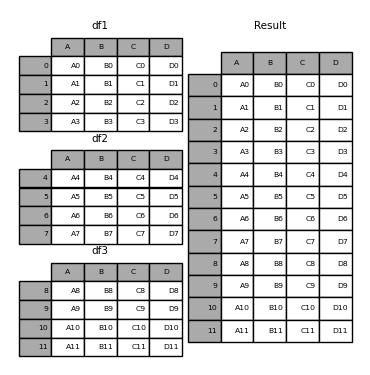

In [81]:
display.Image('./images/merging_concat_basic.png')

In [82]:
iris = pd.read_csv('./files/Iris.csv')
iris_medidas = iris.iloc[:, 0:4]
iris_medidas

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm
0,1,5.1,3.5,1.4
1,2,4.9,3.0,1.4
2,3,4.7,3.2,1.3
3,4,4.6,3.1,1.5
4,5,5.0,3.6,1.4
...,...,...,...,...
145,146,6.7,3.0,5.2
146,147,6.3,2.5,5.0
147,148,6.5,3.0,5.2
148,149,6.2,3.4,5.4


In [83]:
iris_especies = iris[['Species']]
iris_especies

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [84]:
# Apendizar una columna nueva usando concat:
# axis=1 elegimos el eje 
# join='inner' elegimos el tipo de unión:

new_setosa = pd.concat([iris_medidas, iris_especies], axis=1, join='inner')
new_setosa

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,Species
0,1,5.1,3.5,1.4,Iris-setosa
1,2,4.9,3.0,1.4,Iris-setosa
2,3,4.7,3.2,1.3,Iris-setosa
3,4,4.6,3.1,1.5,Iris-setosa
4,5,5.0,3.6,1.4,Iris-setosa
...,...,...,...,...,...
145,146,6.7,3.0,5.2,Iris-virginica
146,147,6.3,2.5,5.0,Iris-virginica
147,148,6.5,3.0,5.2,Iris-virginica
148,149,6.2,3.4,5.4,Iris-virginica


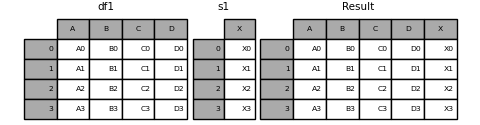

In [85]:
display.Image('./images/merging_concat_mixed.png')

## ```merge()```

**many-to-many:**  El método merge une dos dataframe por el Id de cada una de las filas

In [86]:
new_species = iris.loc[:, ['Id', 'Species']]
new_species

,Id,Species
0,1,Iris-setosa
1,2,Iris-setosa
2,3,Iris-setosa
3,4,Iris-setosa
4,5,Iris-setosa
...,...,...
145,146,Iris-virginica
146,147,Iris-virginica
147,148,Iris-virginica
148,149,Iris-virginica


In [87]:
new_setosa = pd.merge(iris_medidas, new_species, on='Id')
new_setosa

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,Species
0,1,5.1,3.5,1.4,Iris-setosa
1,2,4.9,3.0,1.4,Iris-setosa
2,3,4.7,3.2,1.3,Iris-setosa
3,4,4.6,3.1,1.5,Iris-setosa
4,5,5.0,3.6,1.4,Iris-setosa
...,...,...,...,...,...
145,146,6.7,3.0,5.2,Iris-virginica
146,147,6.3,2.5,5.0,Iris-virginica
147,148,6.5,3.0,5.2,Iris-virginica
148,149,6.2,3.4,5.4,Iris-virginica


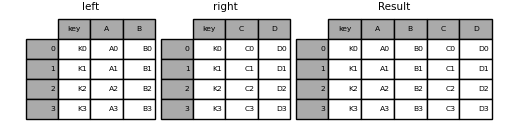

In [88]:
display.Image('./images/merging_merge_on_key.png')

Se puede añadir un parámetro que se llama ```how```, donde se especifica el tipo de unión de los dataframes, para ello, nos basamos en la siguiente tabla para relacionarlos con los comandos SQL:

| Merge method |  SQL Join Name  |                  Description                       | 
|--------------|-----------------|----------------------------------------------------|
|     left     | LEFT OUTER JOIN | Use keys from left frame only                      | 
|    right     | RIGHT OUTER JOIN| Use keys from right frame only                     |
|    outer     | FULL OUTER JOIN | Use union of keys from both frames                 |
|    inner     |   INNER JOIN    | Use intersection of keys from both frames          | 
|    cross     |   CROSS JOIN    | Create the cartesian product of rows of both frames|

In [89]:
new_setosa = pd.merge(iris_medidas, new_species, how='left', on='Id')
new_setosa

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,Species
0,1,5.1,3.5,1.4,Iris-setosa
1,2,4.9,3.0,1.4,Iris-setosa
2,3,4.7,3.2,1.3,Iris-setosa
3,4,4.6,3.1,1.5,Iris-setosa
4,5,5.0,3.6,1.4,Iris-setosa
...,...,...,...,...,...
145,146,6.7,3.0,5.2,Iris-virginica
146,147,6.3,2.5,5.0,Iris-virginica
147,148,6.5,3.0,5.2,Iris-virginica
148,149,6.2,3.4,5.4,Iris-virginica


In [90]:
new_setosa = pd.merge(iris_medidas, new_species, how='right', on='Id')
new_setosa

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,Species
0,1,5.1,3.5,1.4,Iris-setosa
1,2,4.9,3.0,1.4,Iris-setosa
2,3,4.7,3.2,1.3,Iris-setosa
3,4,4.6,3.1,1.5,Iris-setosa
4,5,5.0,3.6,1.4,Iris-setosa
...,...,...,...,...,...
145,146,6.7,3.0,5.2,Iris-virginica
146,147,6.3,2.5,5.0,Iris-virginica
147,148,6.5,3.0,5.2,Iris-virginica
148,149,6.2,3.4,5.4,Iris-virginica


In [91]:
new_setosa = pd.merge(iris_medidas, new_species, how='inner', on='Id')
new_setosa

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,Species
0,1,5.1,3.5,1.4,Iris-setosa
1,2,4.9,3.0,1.4,Iris-setosa
2,3,4.7,3.2,1.3,Iris-setosa
3,4,4.6,3.1,1.5,Iris-setosa
4,5,5.0,3.6,1.4,Iris-setosa
...,...,...,...,...,...
145,146,6.7,3.0,5.2,Iris-virginica
146,147,6.3,2.5,5.0,Iris-virginica
147,148,6.5,3.0,5.2,Iris-virginica
148,149,6.2,3.4,5.4,Iris-virginica


In [92]:
new_setosa = pd.merge(iris_medidas, new_species, how='outer', on='Id')
new_setosa

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,Species
0,1,5.1,3.5,1.4,Iris-setosa
1,2,4.9,3.0,1.4,Iris-setosa
2,3,4.7,3.2,1.3,Iris-setosa
3,4,4.6,3.1,1.5,Iris-setosa
4,5,5.0,3.6,1.4,Iris-setosa
...,...,...,...,...,...
145,146,6.7,3.0,5.2,Iris-virginica
146,147,6.3,2.5,5.0,Iris-virginica
147,148,6.5,3.0,5.2,Iris-virginica
148,149,6.2,3.4,5.4,Iris-virginica


In [93]:
new_setosa = pd.merge(iris_medidas, new_species, how='cross')
new_setosa

,Id_x,SepalLengthCm,SepalWidthCm,PetalLengthCm,Id_y,Species
0,1,5.1,3.5,1.4,1,Iris-setosa
1,1,5.1,3.5,1.4,2,Iris-setosa
2,1,5.1,3.5,1.4,3,Iris-setosa
3,1,5.1,3.5,1.4,4,Iris-setosa
4,1,5.1,3.5,1.4,5,Iris-setosa
...,...,...,...,...,...,...
22495,150,5.9,3.0,5.1,146,Iris-virginica
22496,150,5.9,3.0,5.1,147,Iris-virginica
22497,150,5.9,3.0,5.1,148,Iris-virginica
22498,150,5.9,3.0,5.1,149,Iris-virginica


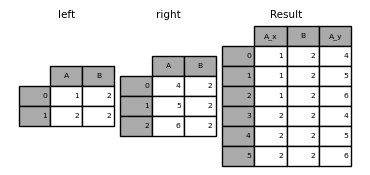

In [94]:
# Si no existe la clave la duplica en el caso how=cross:

display.Image('./images/merging_merge_on_key_dup.png')

## ```join()```

In [95]:
iris_medidas

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm
0,1,5.1,3.5,1.4
1,2,4.9,3.0,1.4
2,3,4.7,3.2,1.3
3,4,4.6,3.1,1.5
4,5,5.0,3.6,1.4
...,...,...,...,...
145,146,6.7,3.0,5.2
146,147,6.3,2.5,5.0
147,148,6.5,3.0,5.2
148,149,6.2,3.4,5.4


In [96]:
iris_especies

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [97]:
iris_2 = iris_medidas.join(iris_especies)
iris_2

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,Species
0,1,5.1,3.5,1.4,Iris-setosa
1,2,4.9,3.0,1.4,Iris-setosa
2,3,4.7,3.2,1.3,Iris-setosa
3,4,4.6,3.1,1.5,Iris-setosa
4,5,5.0,3.6,1.4,Iris-setosa
...,...,...,...,...,...
145,146,6.7,3.0,5.2,Iris-virginica
146,147,6.3,2.5,5.0,Iris-virginica
147,148,6.5,3.0,5.2,Iris-virginica
148,149,6.2,3.4,5.4,Iris-virginica


También se le puede añadir los parámetros de how y on, igual que se hace con el método ```merge()```

## Grouping

Por "group by" nos referimos a un proceso que implica uno o más de los siguientes pasos:

- **Splitting** los datos en grupos según ciertos criterios

- **Applying** una función a cada grupo de forma independiente

- **Combining** los resultados en una estructura de datos

In [98]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [99]:
iris_sepal = iris.groupby('Species')[["SepalLengthCm", "SepalWidthCm"]].mean()
iris_sepal

,SepalLengthCm,SepalWidthCm
Species,,
Iris-setosa,5.006,3.418
Iris-versicolor,5.936,2.770
Iris-virginica,6.588,2.974


In [100]:
iris_petal = iris.groupby('Species')[["PetalLengthCm", "PetalWidthCm"]].mean()
iris_petal

,PetalLengthCm,PetalWidthCm
Species,,
Iris-setosa,1.464,0.244
Iris-versicolor,4.260,1.326
Iris-virginica,5.552,2.026


## Reshaping

## ```stack()```

In [101]:
# Ponemos como columna de index la de especies, asi aplicaremos los datos segun de que
# especie sean:

reiris = iris.set_index('Species', append=True)
reiris

,,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
,Species,,,,,
0,Iris-setosa,1,5.1,3.5,1.4,0.2
1,Iris-setosa,2,4.9,3.0,1.4,0.2
2,Iris-setosa,3,4.7,3.2,1.3,0.2
3,Iris-setosa,4,4.6,3.1,1.5,0.2
4,Iris-setosa,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...,...
145,Iris-virginica,146,6.7,3.0,5.2,2.3
146,Iris-virginica,147,6.3,2.5,5.0,1.9
147,Iris-virginica,148,6.5,3.0,5.2,2.0


In [102]:
stack_iris = reiris.stack(future_stack=True)
stack_iris

     Species                      
0    Iris-setosa     Id                 1.0
                     SepalLengthCm      5.1
                     SepalWidthCm       3.5
                     PetalLengthCm      1.4
                     PetalWidthCm       0.2
                                      ...  
149  Iris-virginica  Id               150.0
                     SepalLengthCm      5.9
                     SepalWidthCm       3.0
                     PetalLengthCm      5.1
                     PetalWidthCm       1.8
Length: 750, dtype: float64

Nos muestra los datos apilados según la especie y las longitudes de los pétalos y sépalos.

Para desapilar usaremos el método ```unstack```.

In [103]:
unstack_iris = reiris.unstack()
unstack_iris

Id                                SepalLengthCm  \
Species Iris-setosa Iris-versicolor Iris-virginica   Iris-setosa   
0               1.0             NaN            NaN           5.1   
1               2.0             NaN            NaN           4.9   
2               3.0             NaN            NaN           4.7   
3               4.0             NaN            NaN           4.6   
4               5.0             NaN            NaN           5.0   
..              ...             ...            ...           ...   
145             NaN             NaN          146.0           NaN   
146             NaN             NaN          147.0           NaN   
147             NaN             NaN          148.0           NaN   
148             NaN             NaN          149.0           NaN   
149             NaN             NaN          150.0           NaN   

                                       SepalWidthCm                  \
Species Iris-versicolor Iris-virginica  Iris-setosa Iris-versicolor   
0                   NaN            NaN          3.5             NaN   
1                   NaN            NaN          3.0             NaN   
2                   NaN            NaN          3.2             NaN   
3                   NaN            NaN          3.1             NaN   
4                   NaN            NaN          3.6             NaN   
..                  ...            ...          ...             ...   
145                 NaN            6.7          NaN             NaN   
146                 NaN            6.3          NaN             NaN   
147                 NaN            6.5          NaN             NaN   
148                 NaN            6.2          NaN             NaN   
149                 NaN            5.9          NaN             NaN   

                       PetalLengthCm                                 \
Species Iris-virginica   Iris-setosa Iris-versicolor Iris-virginica   
0                  NaN           1.4             NaN            NaN   
1                  NaN           1.4             NaN            NaN   
2                  NaN           1.3             NaN            NaN   
3                  NaN           1.5             NaN            NaN   
4                  NaN           1.4             NaN            NaN   
..                 ...           ...             ...            ...   
145                3.0           NaN             NaN            5.2   
146                2.5           NaN             NaN            5.0   
147                3.0           NaN             NaN            5.2   
148                3.4           NaN             NaN            5.4   
149                3.0           NaN             NaN            5.1   

        PetalWidthCm                                 
Species  Iris-setosa Iris-versicolor Iris-virginica  
0                0.2             NaN            NaN  
1                0.2             NaN            NaN  
2                0.2             NaN            NaN  
3                0.2             NaN            NaN  
4                0.2             NaN            NaN  
..               ...             ...            ...  
145              NaN             NaN            2.3  
146              NaN             NaN            1.9  
147              NaN             NaN            2.0  
148              NaN             NaN            2.3  
149              NaN             NaN            1.8  

[150 rows x 15 columns]

## ```pivot_table()```

In [104]:
# Agrupación de datos de especie por media:
# Podemos añadir: df, values="D", index=["A", "B"], columns=["C"]

iris_pivot = pd.pivot_table(iris, index='Species')
iris_pivot

,Id,PetalLengthCm,PetalWidthCm,SepalLengthCm,SepalWidthCm
Species,,,,,
Iris-setosa,25.5,1.464,0.244,5.006,3.418
Iris-versicolor,75.5,4.260,1.326,5.936,2.770
Iris-virginica,125.5,5.552,2.026,6.588,2.974


In [105]:
# Agrupación de datos de especie por media:

iris_pivot2 = pd.pivot_table(iris, index='Species', aggfunc="sum")
iris_pivot2

,Id,PetalLengthCm,PetalWidthCm,SepalLengthCm,SepalWidthCm
Species,,,,,
Iris-setosa,1275,73.2,12.2,250.3,170.9
Iris-versicolor,3775,213.0,66.3,296.8,138.5
Iris-virginica,6275,277.6,101.3,329.4,148.7


In [106]:
# el parametro values nos ayuda a seleccionar las columnas concretas:


iris_pivot = pd.pivot_table(iris, values="PetalLengthCm", index='Species')
iris_pivot

,PetalLengthCm
Species,
Iris-setosa,1.464
Iris-versicolor,4.260
Iris-virginica,5.552


## Time Series

In [107]:
# Generamos una serie temporal primero generamos los valores de la fecha de la que quieres partir, creando 15 días consecutivos:
# Una vez creados ponemos valores aleatorios a esas fechas:

rng = pd.date_range("6/1/2024 00:00", periods=15, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2024-06-01   -0.288107
2024-06-02    0.370095
2024-06-03   -1.016510
2024-06-04   -0.534900
2024-06-05    0.665725
2024-06-06   -0.030754
2024-06-07   -0.398885
2024-06-08   -0.354273
2024-06-09   -1.640718
2024-06-10    2.034297
2024-06-11   -0.027026
2024-06-12   -0.654963
2024-06-13   -0.492587
2024-06-14   -0.274447
2024-06-15   -1.237346
Freq: D, dtype: float64

## ```tz_localize()```

In [108]:
# añadimos la hora al dataframe creado:

ts_utc = ts.tz_localize("UTC")
ts_utc

2024-06-01 00:00:00+00:00   -0.288107
2024-06-02 00:00:00+00:00    0.370095
2024-06-03 00:00:00+00:00   -1.016510
2024-06-04 00:00:00+00:00   -0.534900
2024-06-05 00:00:00+00:00    0.665725
2024-06-06 00:00:00+00:00   -0.030754
2024-06-07 00:00:00+00:00   -0.398885
2024-06-08 00:00:00+00:00   -0.354273
2024-06-09 00:00:00+00:00   -1.640718
2024-06-10 00:00:00+00:00    2.034297
2024-06-11 00:00:00+00:00   -0.027026
2024-06-12 00:00:00+00:00   -0.654963
2024-06-13 00:00:00+00:00   -0.492587
2024-06-14 00:00:00+00:00   -0.274447
2024-06-15 00:00:00+00:00   -1.237346
Freq: D, dtype: float64

## ```tz_convert()```

In [109]:
# Ponemos la franja horaria a la cual nos encontramos:

ts_utc.tz_convert("Europe/Madrid")

2024-06-01 02:00:00+02:00   -0.288107
2024-06-02 02:00:00+02:00    0.370095
2024-06-03 02:00:00+02:00   -1.016510
2024-06-04 02:00:00+02:00   -0.534900
2024-06-05 02:00:00+02:00    0.665725
2024-06-06 02:00:00+02:00   -0.030754
2024-06-07 02:00:00+02:00   -0.398885
2024-06-08 02:00:00+02:00   -0.354273
2024-06-09 02:00:00+02:00   -1.640718
2024-06-10 02:00:00+02:00    2.034297
2024-06-11 02:00:00+02:00   -0.027026
2024-06-12 02:00:00+02:00   -0.654963
2024-06-13 02:00:00+02:00   -0.492587
2024-06-14 02:00:00+02:00   -0.274447
2024-06-15 02:00:00+02:00   -1.237346
Freq: D, dtype: float64

## ```offsets.BusinessDay()```

Escogemos de ese periodo de tiempo los que sean laborables, ayuda de offset.BusinnesDay():

In [110]:
rng

DatetimeIndex(['2024-06-01', '2024-06-02', '2024-06-03', '2024-06-04',
               '2024-06-05', '2024-06-06', '2024-06-07', '2024-06-08',
               '2024-06-09', '2024-06-10', '2024-06-11', '2024-06-12',
               '2024-06-13', '2024-06-14', '2024-06-15'],
              dtype='datetime64[ns]', freq='D')

In [111]:
# se añade 5 como número de días a representar:
rng = rng + pd.offsets.BusinessDay(5)

In [112]:
ts = pd.Series(np.random.randn(len(rng)), rng).tz_localize("UTC")
ts

2024-06-07 00:00:00+00:00   -1.007800
2024-06-07 00:00:00+00:00   -0.730140
2024-06-10 00:00:00+00:00   -0.119705
2024-06-11 00:00:00+00:00    0.674214
2024-06-12 00:00:00+00:00   -0.404627
2024-06-13 00:00:00+00:00    0.620892
2024-06-14 00:00:00+00:00   -0.742859
2024-06-14 00:00:00+00:00    0.587692
2024-06-14 00:00:00+00:00    0.236711
2024-06-17 00:00:00+00:00    1.084321
2024-06-18 00:00:00+00:00   -0.685404
2024-06-19 00:00:00+00:00    0.142537
2024-06-20 00:00:00+00:00   -0.176736
2024-06-21 00:00:00+00:00   -0.170452
2024-06-21 00:00:00+00:00    1.839676
dtype: float64

In [113]:
ts.tz_convert("Europe/Madrid")

2024-06-07 02:00:00+02:00   -1.007800
2024-06-07 02:00:00+02:00   -0.730140
2024-06-10 02:00:00+02:00   -0.119705
2024-06-11 02:00:00+02:00    0.674214
2024-06-12 02:00:00+02:00   -0.404627
2024-06-13 02:00:00+02:00    0.620892
2024-06-14 02:00:00+02:00   -0.742859
2024-06-14 02:00:00+02:00    0.587692
2024-06-14 02:00:00+02:00    0.236711
2024-06-17 02:00:00+02:00    1.084321
2024-06-18 02:00:00+02:00   -0.685404
2024-06-19 02:00:00+02:00    0.142537
2024-06-20 02:00:00+02:00   -0.176736
2024-06-21 02:00:00+02:00   -0.170452
2024-06-21 02:00:00+02:00    1.839676
dtype: float64

In [114]:
import matplotlib.pyplot as plt

<Axes: >

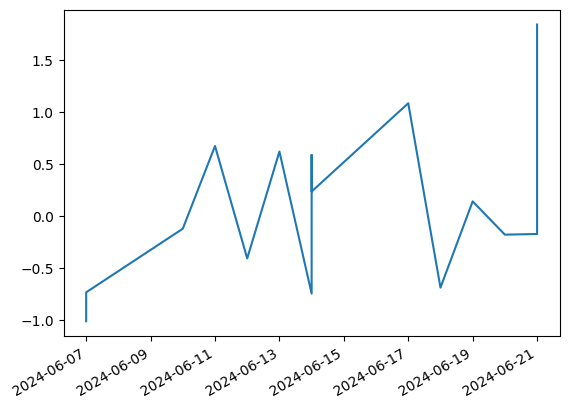

In [115]:
ts.plot()

## Categoricals

In [116]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [117]:
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [118]:
# Convertimos la columna Species en categoricas:
iris["Species"] = iris["Species"].astype("category")
iris.dtypes

Id                  int64
SepalLengthCm     float64
SepalWidthCm      float64
PetalLengthCm     float64
PetalWidthCm      float64
Species          category
dtype: object

## ```rename_categories()```

In [119]:
# Renombrar la columna especie con solo la especie que es:

new_categories = ["setosa", "versicolor", "virginica"]

iris["Species"] = iris["Species"].cat.rename_categories(new_categories)
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


## ```set_categories()```

In [120]:
# Renombrar la columna sustituyendo por los valores por ejemplo,
# renombrar las viejas categorias ponemos rename=True:

new_categories = [0, 1, 2]

iris["spc"] = iris["Species"].cat.set_categories(new_categories, rename=True)
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,spc
0,1,5.1,3.5,1.4,0.2,setosa,0
1,2,4.9,3.0,1.4,0.2,setosa,0
2,3,4.7,3.2,1.3,0.2,setosa,0
3,4,4.6,3.1,1.5,0.2,setosa,0
4,5,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica,2
146,147,6.3,2.5,5.0,1.9,virginica,2
147,148,6.5,3.0,5.2,2.0,virginica,2
148,149,6.2,3.4,5.4,2.3,virginica,2


## ```sort_values()```

In [121]:
# Colocar las filas según los valores de una columna, en este caso ordenamos por la especie (spc):

iris.sort_values(by="spc", ascending=False)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,spc
149,150,5.9,3.0,5.1,1.8,virginica,2
111,112,6.4,2.7,5.3,1.9,virginica,2
122,123,7.7,2.8,6.7,2.0,virginica,2
121,122,5.6,2.8,4.9,2.0,virginica,2
120,121,6.9,3.2,5.7,2.3,virginica,2
...,...,...,...,...,...,...,...
31,32,5.4,3.4,1.5,0.4,setosa,0
30,31,4.8,3.1,1.6,0.2,setosa,0
29,30,4.7,3.2,1.6,0.2,setosa,0
28,29,5.2,3.4,1.4,0.2,setosa,0


In [122]:
# Agrupamos para que nos muestre cuantos valores tenemos de cada uno, para ello usamos observed=False en groupby,
# Incluyen categorias vacias si las hubiera:

iris.groupby("spc", observed=False).size()

spc
0    50
1    50
2    50
dtype: int64

## Plotting

Pandas usa de manera interna matplotlib, simplemente importando la librería y pasando el dataframe a .plot() te genera el gráfico:

<Axes: >

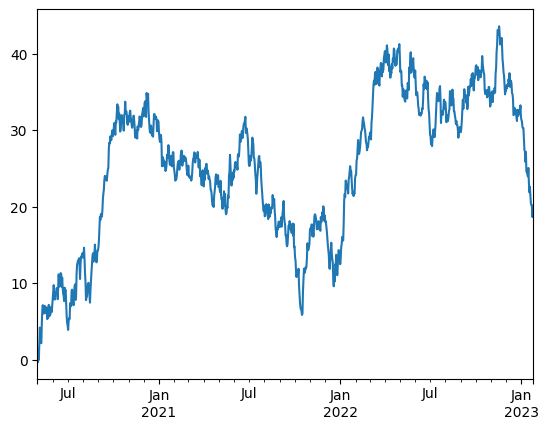

In [123]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("5/1/2020", periods=1000))

ts = ts.cumsum()

ts.plot()

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

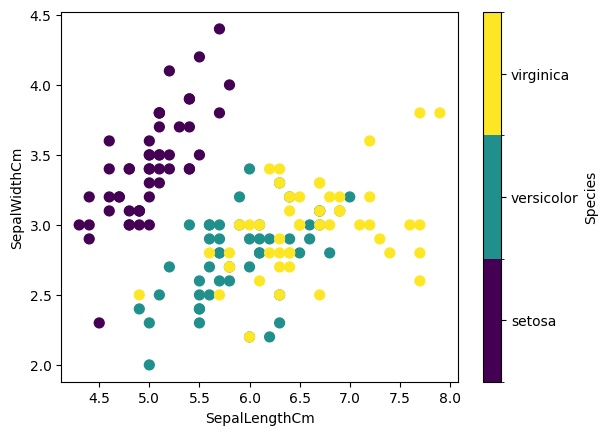

In [124]:
# c: variable categorica
# cmap: escala de color
# s: tamaño de los puntos

iris.plot.scatter(x='SepalLengthCm', y='SepalWidthCm', c='Species', cmap="viridis", s=50)

<Figure size 640x480 with 0 Axes>

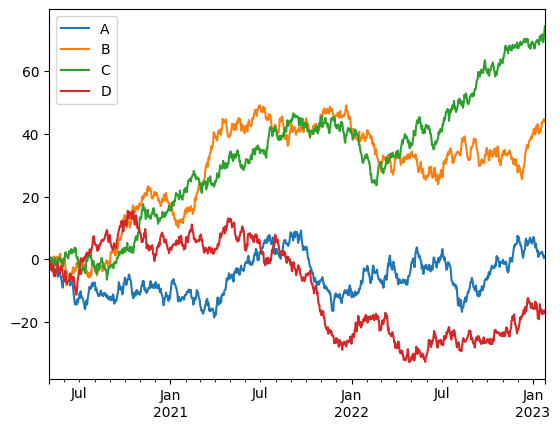

In [125]:
# Usando matplotlib ampliando pandas:

df = pd.DataFrame(
    np.random.randn(1000, 4), 
    index=ts.index, 
    columns=["A", "B", "C", "D"]
)


df = df.cumsum()

plt.figure()

df.plot()

plt.legend(loc='best')

*Creado por:*

*Isabel Maniega*